In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import astropy.units as u
from astropy.io import fits, ascii
from astropy.coordinates import SkyCoord, FK5
from astropy.wcs import WCS
from matplotlib.patches import Rectangle
from scipy import interpolate

import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
uvm2_filter = pd.read_csv('Data/Filters/Swift_UVOT.UVM2.dat',header=None,names = ['Wavelength','Response'],delimiter="\s+")
uvw2_filter = pd.read_csv('Data/Filters/Swift_UVOT.UVW2.dat',header=None,names = ['Wavelength','Response'],delimiter="\s+")
uvw1_filter = pd.read_csv('Data/Filters/Swift_UVOT.UVW1.dat',header=None,names = ['Wavelength','Response'],delimiter="\s+")
filters = [uvm2_filter,uvw2_filter,uvw1_filter]

uvm2_zeropt = 2.1583e-8 # For AB System
uvw2_zeropt = 2.50225e-8 
uvw1_zeropt = 1.5109e-8


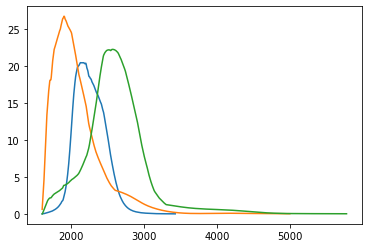

In [3]:
[plt.plot(f['Wavelength'],f['Response']) for f in filters ];

In [4]:
spec = pd.read_csv('Data/SpectralModels/J_A+A_615_A78_m002.dat.text',skiprows=36,delimiter="\s+",names = ['Model','NUV','FUV','UVW1','UVW2','UVM2','U','B','V','R','I','J','H','Ks'])
spec = spec.drop(10)
spec

,Model,NUV,FUV,UVW1,UVW2,UVM2,U,B,V,R,I,J,H,Ks
0,M1_2.0q0.8P3.4Z0.002_vinf1.5,4.223933,3.793576,4.258155,4.066356,4.217036,4.803604,4.793904,5.091305,5.328437,5.754795,6.524390,7.088530,7.686177
1,M1_2.21q0.8P3.8Z0.002_vinf1.5,3.640933,3.160217,3.686069,3.465729,3.633106,4.286821,4.326165,4.645840,4.890139,5.327255,6.116802,6.688307,7.292260
2,M1_2.44q0.8P4.1Z0.002_vinf1.5,3.081766,2.567730,3.135716,2.893717,3.073065,3.783574,3.869702,4.208145,4.458948,4.906023,5.714311,6.292845,6.902608
3,M1_2.7q0.8P4.4Z0.002_vinf1.5,2.443466,1.903117,2.507548,2.245775,2.433800,3.209778,3.366886,3.733295,3.992181,4.452010,5.287698,5.875341,6.491266
4,M1_2.99q0.8P4.7Z0.002_vinf1.5,1.943523,1.404601,2.010297,1.744904,1.933383,2.731280,2.924649,3.304594,3.565755,4.029425,4.875806,5.464423,6.080852
5,M1_3.3q0.8P5.1Z0.002_vinf1.5,1.502256,0.965094,1.571269,1.302364,1.491668,2.307200,2.528177,2.919100,3.181583,3.647390,4.500460,5.088699,5.704686
6,M1_3.65q0.8P5.4Z0.002_vinf1.5,1.087663,0.585112,1.153801,0.902084,1.074083,1.899671,2.157947,2.557828,2.826076,3.302048,4.175114,4.773354,5.399033
7,M1_4.04q0.8P5.8Z0.002_vinf1.5,0.712073,0.194753,0.776148,0.520599,0.698447,1.528630,1.800333,2.202779,2.469296,2.943333,3.815482,4.411559,5.034696
8,M1_4.46q0.8P6.3Z0.002_vinf1.5,0.343406,-0.172317,0.403776,0.152718,0.329394,1.157172,1.442275,1.844983,2.110447,2.583428,3.455441,4.050518,4.673218
9,M1_4.93q0.8P6.8Z0.002_vinf1.5,0.035535,-0.469274,0.090396,-0.149809,0.021257,0.843333,1.144293,1.547195,1.812591,2.285727,3.160029,3.755375,4.379118


In [5]:
df = pd.read_csv('Data/SpectralModels/SED_grid_006_m1_2.txt',skiprows=4,header=None,delimiter="\t",names=['lambda','flux'])
df

,lambda,flux
0,6.049500e+01,1.345265e-39
1,6.090129e+01,9.521667e-40
2,6.131031e+01,7.761521e-40
3,6.172208e+01,7.167968e-40
4,6.213660e+01,6.788149e-40
...,...,...
129109,1.691155e+06,6.102755e-25
129110,1.702513e+06,5.941031e-25
129111,1.713947e+06,5.783754e-25
129112,1.725458e+06,5.630514e-25


(-18.0, -12.0)

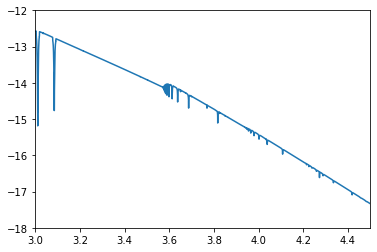

In [6]:
plt.plot(np.log10(df['lambda']),np.log10(df['flux']))
plt.xlim(3,4.5)
plt.ylim(-18,-12)

In [7]:
wave = df['lambda']
flux = df['flux']
response_wave = uvm2_filter['Wavelength']
response = uvm2_filter['Response']

#Interpolate spectrum and response to save wavelengths:
response2 = np.interp(wave,response_wave,response,left=0.0,right=0.0)
flux_int = np.trapz(flux*response2,x=wave)/np.trapz(response2,x=wave)


/home/bethany/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


(-18.0, -12.0)

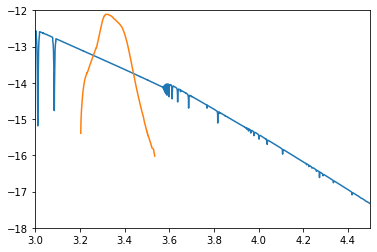

In [8]:
#plt.plot(np.log10(response_wave),np.log10(response))
plt.plot(np.log10(wave),np.log10(flux))
plt.plot(np.log10(wave),np.log10(flux*response2))
plt.xlim(3,4.5)
plt.ylim(-18,-12)

In [9]:

mag = -2.5*np.log10(flux_int/uvm2_zeropt)


In [10]:

mag

14.54437085026013

## That was the first half! Correcting for extinction

In [11]:
lmc_ext_curve = pd.read_csv("Data/ExtinctionCurve/lmc_avg_ext.dat",skiprows=7,sep="\s+",names=["wav_micron^-1","A(lambda)/A(V)","unc"])
lmc_ext_curve.head()

,wav_micron^-1,A(lambda)/A(V),unc
0,0.455,0.030434,0.001777
1,0.606,0.185884,0.008679
2,0.800,0.257140,0.011822
3,1.818,1.000000,0.017482
4,2.273,1.292860,0.085075


In [12]:
def get_interpolated_gordon_function(gordon,interp_wav):
    wav = (np.array(1 / gordon["wav_micron^-1"]) * u.micron).to(u.Angstrom)
    ext = gordon["A(lambda)/A(V)"]
    
    val = 0.1
    new_gordon = np.interp(interp_wav,np.flip(wav.value),ext,left=val,right=val)
    
    return new_gordon


new_gordon = get_interpolated_gordon_function(lmc_ext_curve, wave)

Av = 1
A_lambda = new_gordon * Av

NewSpec = flux/10.**(0.4*A_lambda)

In [13]:
print(min(new_gordon),max(new_gordon))

0.031526135144203285 3.619428280931316


/home/bethany/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


(-18.0, -12.0)

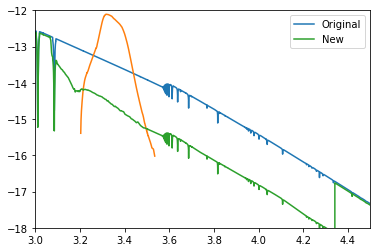

In [14]:

plt.plot(np.log10(wave),np.log10(flux),label="Original")
plt.plot(np.log10(wave),np.log10(flux*response2))
plt.plot(np.log10(wave),np.log10(NewSpec),label="New")
plt.legend()
plt.xlim(3,4.5)
plt.ylim(-18,-12)

In [15]:


#Interpolate spectrum and response to save wavelengths:
response2 = np.interp(wave,response_wave,response,left=0.0,right=0.0)
Newflux_int = np.trapz(NewSpec*response2,x=wave)/np.trapz(response2,x=wave)

uvm2_zeropt = 2.1583e-8
Newmag = -2.5*np.log10(Newflux_int/uvm2_zeropt)



In [16]:
Newmag - mag

2.784243937970867

/home/bethany/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


(-18.0, -12.0)

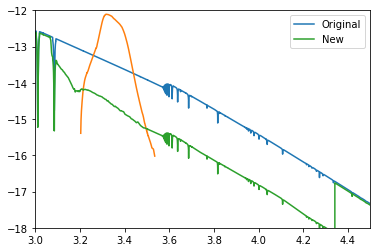

In [17]:
plt.plot(np.log10(wave),np.log10(flux),label="Original")
plt.plot(np.log10(wave),np.log10(flux*response2))
plt.plot(np.log10(wave),np.log10(NewSpec),label="New")
plt.legend()
plt.xlim(3,4.5)
plt.ylim(-18,-12)

## Doing for all filters

In [25]:
def get_interpolated_gordon_function(gordon,interp_wav):
    wav = (np.array(1 / gordon["wav_micron^-1"]) * u.micron).to(u.Angstrom)
    ext = gordon["A(lambda)/A(V)"]
    val = 0.1
    new_gordon = np.interp(interp_wav,np.flip(wav.value),ext,left=val,right=val)
    return new_gordon

def synth_ext(zeropt,Model,Filter,Ext_Curve):
    wave = Model['lambda']
    flux = Model['flux']
    response_wave = Filter['Wavelength']
    response = Filter['Response']

    #Interpolate spectrum and response to save wavelengths:
    response2 = np.interp(wave,response_wave,response,left=0.0,right=0.0)
    flux_int = np.trapz(flux*response2,x=wave)/np.trapz(response2,x=wave)   
    mag = -2.5*np.log10(flux_int/zeropt)
    
    #Calculate NewSpec
    new_gordon = get_interpolated_gordon_function(Ext_Curve, wave)
    Av = 1
    A_lambda = new_gordon * Av
    NewSpec = flux/10.**(0.4*A_lambda)
    
    #Interpolate spectrum and response to save wavelengths:
    response2 = np.interp(wave,response_wave,response,left=0.0,right=0.0)
    Newflux_int = np.trapz(NewSpec*response2,x=wave)/np.trapz(response2,x=wave)
    
    Newmag = -2.5*np.log10(Newflux_int/zeropt)   
    return Newmag - mag

lmc_ext_curve = pd.read_csv("Data/ExtinctionCurve/lmc_avg_ext.dat",skiprows=7,sep="\s+",names=["wav_micron^-1","A(lambda)/A(V)","unc"])
Model = pd.read_csv('Data/SpectralModels/SED_grid_006_m1_2.txt',skiprows=4,header=None,delimiter="\t",names=['lambda','flux'])
uvm2_filter = pd.read_csv('Data/Filters/Swift_UVOT.UVM2.dat',header=None,names = ['Wavelength','Response'],delimiter="\s+")
uvw2_filter = pd.read_csv('Data/Filters/Swift_UVOT.UVW2.dat',header=None,names = ['Wavelength','Response'],delimiter="\s+")
uvw1_filter = pd.read_csv('Data/Filters/Swift_UVOT.UVW1.dat',header=None,names = ['Wavelength','Response'],delimiter="\s+")
filters = [uvm2_filter,uvw2_filter,uvw1_filter]
filtnames=['UVM2','UVW2','UVW1']
uvm2_zeropt = 2.1583e-8 # For AB System
uvw2_zeropt = 2.50225e-8 
uvw1_zeropt = 1.5109e-8
zeropt = [uvm2_zeropt,uvw2_zeropt,uvw1_zeropt]


for zero,Filter,name in zip(zeropt,filters,filtnames):
    coeff = synth_ext(zero,Model,Filter,lmc_ext_curve)   
    print(f"For the LMC, AB Mag system, Filter: {name} Coefficient is {coeff}")



For the LMC, AB Mag system, Filter: UVM2 Coefficient is 2.784243937970867
For the LMC, AB Mag system, Filter: UVW2 Coefficient is 2.655793496749741
For the LMC, AB Mag system, Filter: UVW1 Coefficient is 2.941905976671647
